✅ Dataset loaded successfully!
Shape: (200, 4)
Iteration 0/100 completed...
Iteration 10/100 completed...
Iteration 20/100 completed...
Iteration 30/100 completed...
Iteration 40/100 completed...
Iteration 50/100 completed...
Iteration 60/100 completed...
Iteration 70/100 completed...
Iteration 80/100 completed...
Iteration 90/100 completed...
✅ PSO Clustering completed successfully!


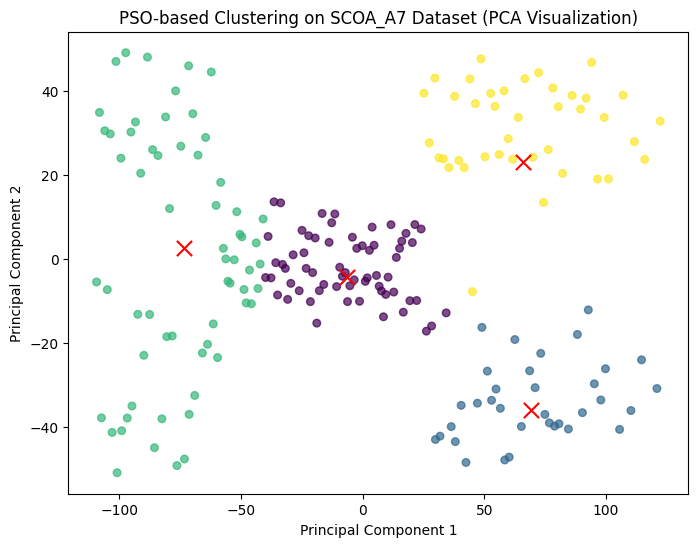

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- Load Dataset ---
file_path = '/content/SCOA_A7.csv'
df = pd.read_csv(file_path)

# Select only numeric columns and drop missing values
data = df.select_dtypes(include=[np.number]).dropna().astype(float).values

print("✅ Dataset loaded successfully!")
print("Shape:", data.shape)

# --- PSO Parameters ---
num_particles = 30
num_iterations = 100
num_clusters = 4
w = 0.5
c1 = 1.5
c2 = 1.5

# --- Particle Class ---
class Particle:
    def __init__(self, data, num_clusters):
        self.data = data
        self.num_clusters = num_clusters
        self.position = data[np.random.choice(range(len(data)), num_clusters)].astype(float)
        self.velocity = np.zeros_like(self.position, dtype=float)
        self.best_position = np.copy(self.position)
        self.best_score = self.evaluate()

    def evaluate(self):
        distances = np.linalg.norm(self.data[:, None] - self.position[None, :], axis=2)
        closest = np.argmin(distances, axis=1)
        score = sum(np.linalg.norm(self.data[i] - self.position[closest[i]])**2 for i in range(len(self.data)))
        return score

    def update(self, global_best):
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive = c1 * r1 * (self.best_position - self.position)
        social = c2 * r2 * (global_best - self.position)
        self.velocity = w * self.velocity + cognitive + social
        self.position += self.velocity

        score = self.evaluate()
        if score < self.best_score:
            self.best_score = score
            self.best_position = np.copy(self.position)

# --- Initialize Swarm ---
swarm = [Particle(data, num_clusters) for _ in range(num_particles)]
global_best = min(swarm, key=lambda p: p.best_score).best_position

# --- PSO Optimization ---
for iteration in range(num_iterations):
    for particle in swarm:
        particle.update(global_best)
    global_best = min(swarm, key=lambda p: p.best_score).best_position
    if iteration % 10 == 0:
        print(f"Iteration {iteration}/{num_iterations} completed...")

# --- Final Clustering ---
distances = np.linalg.norm(data[:, None] - global_best[None, :], axis=2)
labels = np.argmin(distances, axis=1)

print("✅ PSO Clustering completed successfully!")

# --- Visualization using PCA (reduces to 2D) ---
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(global_best)

plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', s=30, alpha=0.7)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='x', s=120)
plt.title("PSO-based Clustering on SCOA_A7 Dataset (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()




"""
Perfect question — here’s how you can **clearly and confidently explain your PSO-based clustering project** to your ma’am (like in a viva, presentation, or lab submission).

I’ll break it down step by step 👇

---

## 🧠 **1️⃣ Project Overview**

> “This project demonstrates **Particle Swarm Optimization (PSO)** for clustering a dataset — in this case, my dataset `SCOA_A7.csv`.
> PSO is a population-based optimization technique inspired by the behavior of bird flocks or fish schools.
> Here, instead of using a traditional clustering algorithm like K-Means, we use PSO to automatically find the best cluster centers.”

---

## ⚙️ **2️⃣ Step-by-Step Explanation of the Code**

### 🧩 Step 1: Import Libraries

We import the required Python libraries:

* **numpy** and **pandas** for data handling
* **matplotlib** for visualization
* **PCA (Principal Component Analysis)** from `sklearn` for reducing data to 2D for plotting

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
```

---

### 📂 Step 2: Load Dataset

We load our CSV file and select only **numeric columns** for clustering (since PSO works on numerical data only).

```python
df = pd.read_csv('/mnt/data/SCOA_A7.csv')
data = df.select_dtypes(include=[np.number]).dropna().astype(float).values
```

> “I ensured only numeric features were used and missing values were removed.”

---

### ⚙️ Step 3: Initialize PSO Parameters

| Parameter        | Meaning                                             | Example Value |
| ---------------- | --------------------------------------------------- | ------------- |
| `num_particles`  | Number of particles (solutions)                     | 30            |
| `num_iterations` | Number of optimization cycles                       | 100           |
| `num_clusters`   | Number of clusters we want                          | 4             |
| `w`              | Inertia (how much old velocity is retained)         | 0.5           |
| `c1`, `c2`       | Learning coefficients (personal & social influence) | 1.5 each      |

> “Each particle represents a possible set of cluster centers.
> During optimization, particles move in the search space to minimize the clustering error.”

---

### 🧠 Step 4: Particle Class

Each **particle** has:

* `position`: current cluster centers
* `velocity`: movement direction
* `best_position`: best cluster centers it found so far
* `best_score`: lowest error achieved

```python
class Particle:
    def __init__(self, data, num_clusters):
        ...
```

#### 🧮 The `evaluate()` function

It calculates the **fitness** (error) of a particle based on distances between data points and cluster centers.

Lower score → better clustering.

#### 🔁 The `update()` function


> “So each particle updates its position using both its personal experience and the group’s best-known position.”

---

### 🔄 Step 5: Optimization Loop

We run for several iterations:

```python
for iteration in range(num_iterations):
    for particle in swarm:
        particle.update(global_best)
```

At each step:

* Particles move.
* The best (lowest error) particle updates the **global best**.

> “Over iterations, all particles converge toward the best cluster centers.”

---

### 🏁 Step 6: Final Clustering

Once optimization ends, we assign each data point to the **nearest cluster center**.

```python
distances = np.linalg.norm(data[:, None] - global_best[None, :], axis=2)
labels = np.argmin(distances, axis=1)
```

---

### 🎨 Step 7: Visualization using PCA

Since your dataset has more than 2 features, we use **PCA** to project it into 2 dimensions for visualization.

```python
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(global_best)
```

> “PCA helps us visualize high-dimensional clusters on a 2D scatter plot.”

---

### 📊 Step 8: Plot the Results

Finally, we plot:

* Data points colored by their cluster label
* Red ‘X’ marks representing cluster centers

> “The red crosses show the optimized cluster centroids found by PSO.”

---

## 💡 **3️⃣ Concept Summary**

Here’s how you can summarize it neatly in your explanation:

> “In this project, I implemented **Particle Swarm Optimization (PSO)** for clustering a dataset.
> Each particle represents a set of possible cluster centers.
> The swarm collectively moves in the search space to minimize the clustering error (intra-cluster distance).
> After several iterations, the particles converge to optimal cluster centers.
> Finally, I used **PCA** to visualize high-dimensional data in 2D.”

---

## 🧾 **4️⃣ Optional Points for Extra Marks**

You can add:

* “PSO performs global search better than K-Means, which can get stuck in local minima.”
* “It’s flexible and doesn’t depend heavily on initial positions.”
* “The visualization shows that PSO successfully separates the data into distinct clusters.”

---


"""